In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation,Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import torch
import random
from tqdm import tqdm
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from google.colab import drive
from keras import utils as np_utils
import os
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize


import tensorflow as tf
import cv2

from sklearn.preprocessing import LabelEncoder
from keras.applications.resnet import ResNet50
from keras.applications.densenet import DenseNet121
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB5
from keras.applications.vgg16 import VGG16

from keras.applications import imagenet_utils
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths = os.path.join(dirname, filename)


Mounted at /content/drive


In [2]:
data=[]
labels=[]

height = 64
width = 64
channels = 3
classes = 5
n_inputs = height * width * channels

path1 = "/content/drive/My Drive/papsmear project/New folder/im_Dyskeratotic/CROPPED/"
path2 = "/content/drive/My Drive/papsmear project/New folder//im_Koilocytotic/CROPPED/"
path3 = "/content/drive/My Drive/papsmear project/New folder//im_Metaplastic/CROPPED/"
path4 = "/content/drive/My Drive/papsmear project/New folder//im_Parabasal/CROPPED/"
path5 = "/content/drive/My Drive/papsmear project/New folder//im_Superficial-Intermediate/CROPPED/"

path = [path1, path2, path3, path4, path5]

# print(Class)
i = 0
for p in path:
    Class=os.listdir(p)
    for a in Class:
        if(a[-1] == 'p'):
            labels.append(i)
            try:
                image=cv2.imread(p+a)
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((height, width))
                data.append(np.array(size_image))
            except AttributeError:
                print(" ")
    i+=1

# Converting data to ndarray -
labels = np.array(labels)
data = np.array(data)

print(data.shape)
print(labels.shape)
print(labels)

# Randomize the order of the input images
s = np.arange(data.shape[0])
np.random.seed(43)
np.random.shuffle(s)
data = data[s]
labels = labels[s]

(4049, 64, 64, 3)
(4049,)
[0 0 0 ... 4 4 4]


In [3]:
model_densenet     = DenseNet121(weights = 'imagenet', include_top = False)
model_res     = ResNet50(weights = 'imagenet', include_top = False)

model_efficientnet = EfficientNetB5(weights = 'imagenet', include_top = False)
model_Xception     = Xception(weights = 'imagenet', include_top = False)
model_MobileNet = MobileNet(weights = 'imagenet', include_top = False)
model_InceptionV3     = tf.keras.applications.regnet.RegNetX002(weights = 'imagenet', include_top = False)

feature_densenet=model_densenet(data)
feature_efficientnet=model_efficientnet(data)
feature_xception=model_Xception(data)
features_mobilenet=model_MobileNet(data)
features_inceptiont=model_InceptionV3(data)
features_densenet     = model_densenet.predict(data)
features_res=model_res.predict(data)
print(feature_xception.shape)
print(features_mobilenet.shape)
print(features_inceptiont.shape)
print(features_densenet.shape)
extracted_features = []


for kk,d_1,d_2,f_r, f_d,f_n, f_e, label in zip(features_res,feature_densenet,feature_efficientnet,feature_xception, features_mobilenet, features_inceptiont,features_densenet, labels):
    #print(f_r.shape[0] )
    #print(f_r.shape[1] )
    #print(f_r.shape[2] )
    d_1 = np.reshape(d_1,((d_1.shape[0] * d_1.shape[1] * d_1.shape[2])))
    d_2 = np.reshape(d_2,((d_2.shape[0] * d_2.shape[1] * d_2.shape[2])))
    f_r = np.reshape(f_r,((f_r.shape[0] * f_r.shape[1] * f_r.shape[2])))
    f_d = np.reshape(f_d,((f_d.shape[0] * f_d.shape[1] * f_d.shape[2])))
    f_n = np.reshape(f_n,((f_n.shape[0] * f_n.shape[1] * f_n.shape[2])))
    f_e = np.reshape(f_e,((f_e.shape[0] * f_e.shape[1] * f_e.shape[2])))
    kk=np.reshape(kk,((kk.shape[0] * kk.shape[1] * kk.shape[2])))
    f_r = np.append(f_r, d_1)
    f_r = np.append(f_r, d_2)
    f_r = np.append(f_r, f_d)
    f_r = np.append(f_r, f_n)
    f_r = np.append(f_r, f_e)
    f_r = np.append(f_r, kk)
    f_r = np.append(f_r, label)
    extracted_features.append(f_r)

extracted_features = np.array(extracted_features)

print(extracted_features.shape)

83683744/83683744 [==============================] - 4s 0us/step


127/127 [==============================] - 3s 13ms/step
(4049, 2, 2, 2048)
(4049, 2, 2, 1024)
(4049, 2, 2, 368)
(4049, 2, 2, 1024)
(4049, 38337)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [5]:
# # Normalization :-

X = extracted_features[:, 0:-1]
y = extracted_features[:, -1]

# scaler = StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [6]:
# PCA :-

pca = PCA(n_components =.95)
pca.fit(scaled_X)
principal_X = pca.transform(scaled_X)

In [7]:
print(principal_X.shape)

(4049, 1332)


In [ ]:
# Check the values of eigen vectors prodeced by principal components
print(len(pca.components_))

# check how much variance is explained by each principal component

print(pca.explained_variance_ratio_)

In [ ]:

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(scaled_X, y)
print(model.feature_importances_)

[[  0.   0.   0. ...   3.  17.  46.]
 [  0.   7.   3. ...   0.   0.   0.]
 [  1.   6.  13. ...   5.   2.   2.]
 ...
 [ 76.  21.   4. ...   0.   0.   0.]
 [126.   6.   9. ...  14.   1.   0.]
 [  2.   0.   0. ...   0.   0.   0.]]


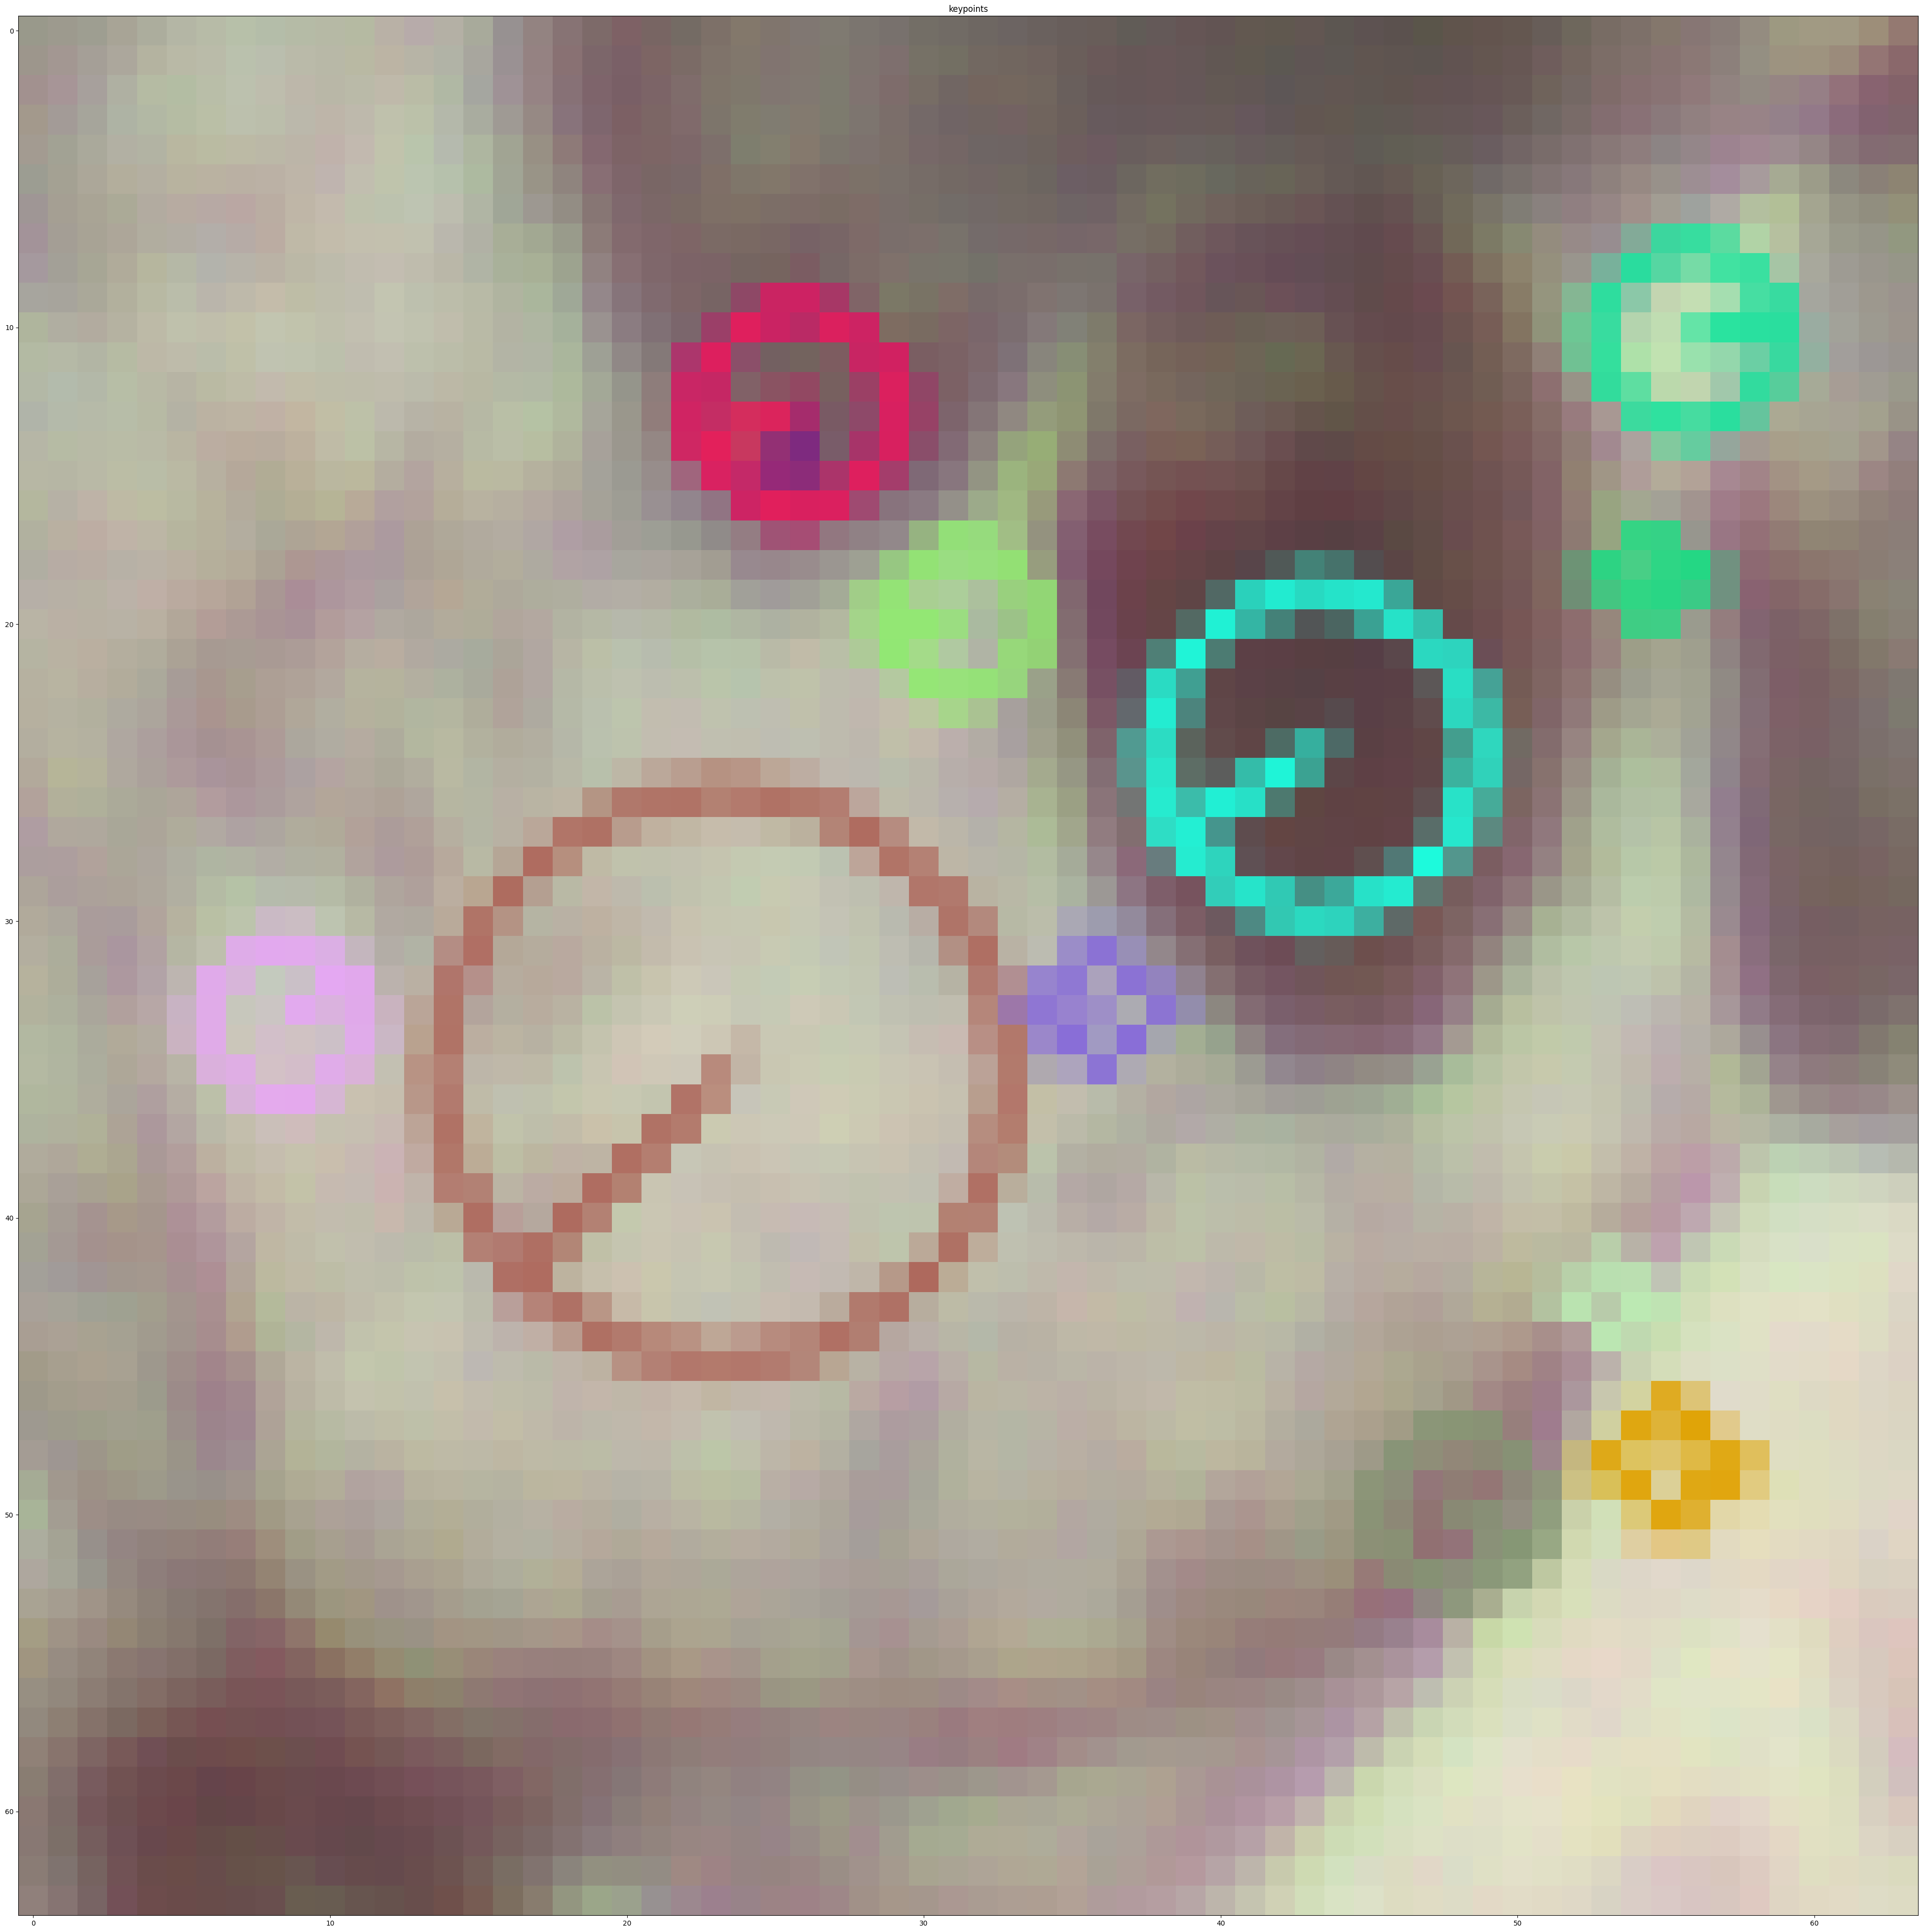

(4049, 200)
()


In [8]:
# use orb if sift is not installed
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)

feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(data[0], None)

print( desc_l)
test = cv2.drawKeypoints(data[0], kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(50,50))
plt.imshow(test)
plt.title("keypoints")
plt.show()


sift = cv2.xfeatures2d.SIFT_create()
siftKeyPoints = []
diameter = 8

for i in range(20, 300, 20):
  for j in range(20, 300, 20):
    keypoint = cv2.KeyPoint(i, j, diameter)
    siftKeyPoints.append(keypoint)

#print(len(siftKeyPoints))

descriptors = []
for i in range(len(data)):
  kp, des = sift.compute(data[i], siftKeyPoints)
  descriptors.extend(des)

numofcluster=70
siftHist = []

from sklearn.cluster import KMeans
numClusters = 200
kMeansClassifier = KMeans(n_clusters=numClusters)
kMeansClassifier.fit(descriptors)


for i in range(len(data)):
  kp, des = sift.compute(data[i], siftKeyPoints)
  imgHist = np.zeros(numClusters)
  numKp = len(kp)
  finalArray = np.asarray(des, dtype = np.float64, order ='C')
  index = kMeansClassifier.predict(finalArray)
  imgHist[index] += 1/(numKp)
  siftHist.append(imgHist)


'''siftHistTest = []
for img in test_data:
  kp, des = sift.compute(img, siftKeyPoints)
  imgHist = np.zeros(numClusters)
  numKp = len(kp)
  index = kMeansClassifier.predict(des)
  imgHist[index] += 1/(numKp)
  siftHistTest.append(imgHist)
'''
trainn = np.array(siftHist)
trainlabel = np.array(label)
print((trainn.shape))
print((trainlabel.shape))

In [ ]:
X1 = trainn[:, :]


# scaler = StandardScaler()
# scaler.fit(X)
# scaled_X = scaler.transform(X)

scaler = MinMaxScaler()
scaled_X1 = scaler.fit_transform(X1)

In [152]:
newtrain=np.concatenate((principal_X,trainn),axis=1)
print(newtrain.shape)

(4049, 922)


In [ ]:
print(len(data))

4049


In [ ]:
# Feature selection using Pearsson's corelation :-

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k=1000)

X_selected = fs.fit_transform(scaled_X, y)
print(X_selected.shape)

(4049, 1000)


In [19]:
# Train-Test-Split :-

X_train, X_test, y_train, y_test = train_test_split(principal_X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3239, 1332)
(810, 1332)
(3239,)
(810,)


In [20]:
cc=tf.keras.utils.to_categorical(y_train, num_classes=5, dtype='float32')
print(cc)
cc1=tf.keras.utils.to_categorical(y_test, num_classes=5, dtype='float32')
print(cc1)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [29]:
import keras.backend as K
import tensorflow as tf

def categorical_focal_loss_with_label_smoothing(gamma=2.0, alpha=0.25,ls=0.2,classes=5):
    """
        loss = -alpha*((1-p)^gamma)*log(p)
        y_ls = (1 - α) * y_hot + α / classes
  """
    def focal_loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred_ls = (1 - ls) * y_pred + ls / classes
        y_pred_ls = K.clip(y_pred_ls, epsilon, 1.0-epsilon)
        cross_entropy = -y_true*K.log(y_pred_ls)
        weight = alpha * y_true * K.pow((1-y_pred_ls), gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=1)
        return loss

    return focal_loss


In [14]:
def generalized_cross_entropy(y_true, y_pred, q):
    """
    2018 - Generalized Cross Entropy Loss for Training Deep Neural Networks with Noisy Labels - https://arxiv.org/pdf/1805.07836.pdf
    """
    intermed_ = tf.pow(tf.reduce_sum(y_true * y_pred, axis=-1), q)
    t_loss = (1 - intermed_) / q
    return tf.reduce_mean(t_loss)

In [ ]:
# # SVM for Classification :-

# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_train, y_train)
# y_svm = svm.predict(X_test)

In [30]:
# Neural Net for classification :-

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization
import keras.backend as K



model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1], 1)))


model.add(Dense(1024, activation='swish'))

model.add(Dense(1024, activation='swish'))


model.add(Dense(5, activation='softmax'))

#Compilation of the model
model.compile(
    loss=categorical_focal_loss_with_label_smoothing(),
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               1048832   
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 1,115,909
Trainable params: 1,115,909
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 500
nn = model.fit(X_train, cc,validation_data=(X_test,cc1), batch_size=500, epochs=epochs)

Epoch 1/500
7/7 [==============================] - 2s 55ms/step - loss: 0.0930 - accuracy: 0.7490 - val_loss: 0.0319 - val_accuracy: 0.9111
Epoch 2/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0150 - accuracy: 0.9571 - val_loss: 0.0183 - val_accuracy: 0.9494
Epoch 3/500
7/7 [==============================] - 0s 16ms/step - loss: 0.0052 - accuracy: 0.9883 - val_loss: 0.0164 - val_accuracy: 0.9457
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0025 - accuracy: 0.9963 - val_loss: 0.0157 - val_accuracy: 0.9568
Epoch 5/500
7/7 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 0.9991 - val_loss: 0.0168 - val_accuracy: 0.9556
Epoch 6/500
7/7 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0170 - val_accuracy: 0.9568
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 0.9556
Epoch 8/500
7/7 [===

26/26 [==============================] - 0s 3ms/step
Accuracy is:  96.79012345679013


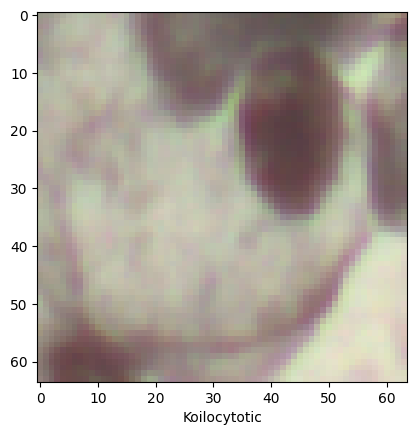

In [76]:
pred = model.predict(X_test)
y_nn = np.argmax(pred, axis=1)
categories = ["Dyskerat", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial"]

def show_the_image(i):
    plt.imshow(data[i])
    plt.xlabel(categories[labels[i]])

show_the_image(0)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_nn)
print("Accuracy is: ", acc*100)

In [ ]:
# print(y_svm[0:10])
# print(y_test[0:10])

In [ ]:
# from sklearn import metrics

# acc_svm = metrics.accuracy_score(y_test, y_svm)
# print("Accuracy of SVM: ", acc_svm*100)

In [ ]:
# # Building Confusion Matrix -
# cm = tf.math.confusion_matrix(labels=y_test, predictions=y_svm)

# import seaborn as sns
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.xlabel("Predicted")
# plt.ylabel("Truth")

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
#target_names=categories
print("Classification Report: \n", classification_report(y_test, y_nn,target_names=categories))

Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.96      0.98      0.97       167
Koilocytotic       0.94      0.94      0.94       165
 Metaplastic       0.95      0.94      0.94       132
   Parabasal       0.99      0.98      0.99       174
 Superficial       0.99      0.99      0.99       172

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



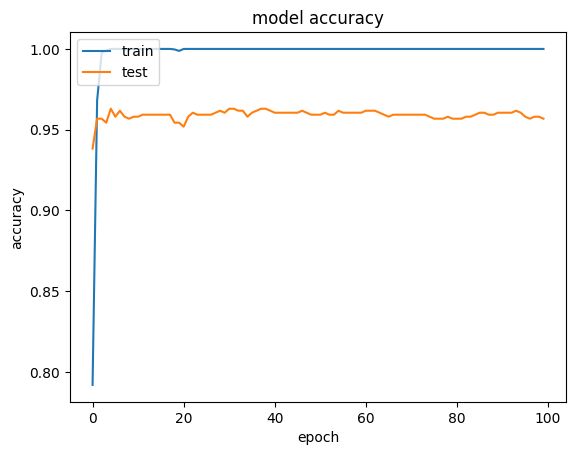

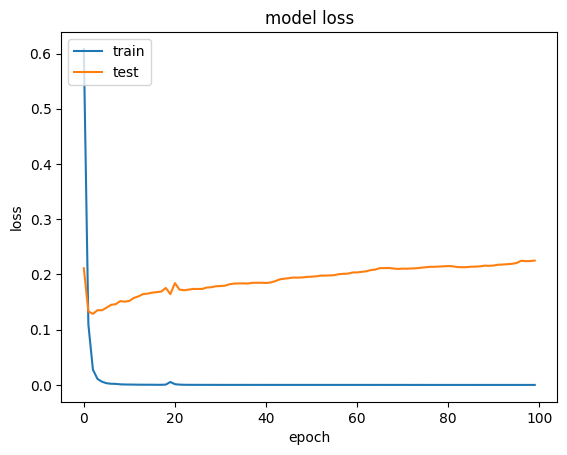

In [ ]:

import numpy as np
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import tensorflow
import tqdm
import glob
plt.plot(nn.history['accuracy'])

    #plt.plot(history.history['accuracy'])
plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        #summarize history for loss
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

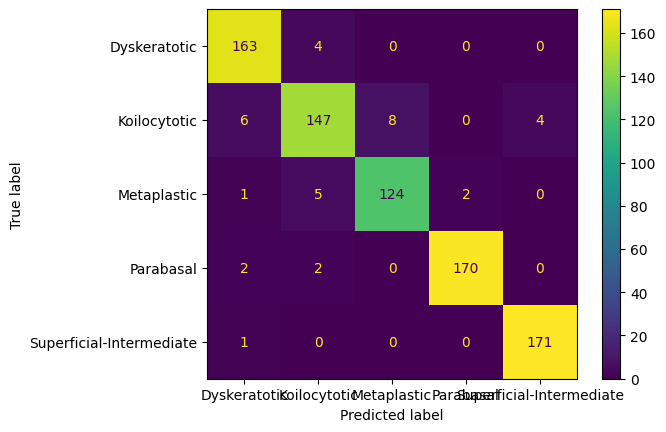

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_nn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  94.81481481481482
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.95      0.97      0.96       167
     Koilocy       0.92      0.87      0.89       165
 Metaplastic       0.90      0.95      0.93       132
   Parabasal       1.00      0.97      0.99       174
 Superficial       0.97      0.98      0.97       172

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



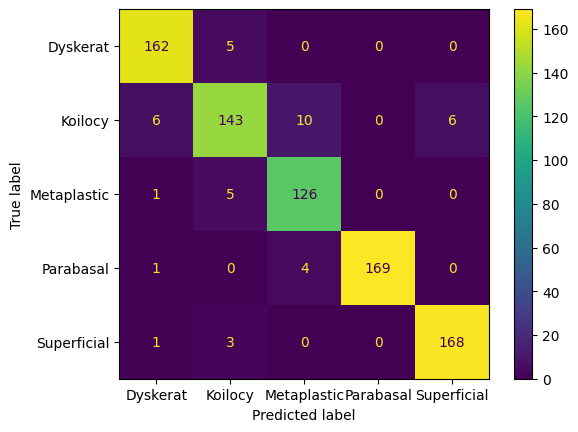

In [16]:
# # SVM for Classification :-
categories = ["Dyskerat", "Koilocy", "Metaplastic", "Parabasal", "Superficial"]

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()


Accuracy of SVM:  94.81481481481482
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.95      0.97      0.96       167
     Koilocy       0.92      0.87      0.89       165
 Metaplastic       0.90      0.95      0.93       132
   Parabasal       1.00      0.97      0.99       174
 Superficial       0.97      0.98      0.97       172

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



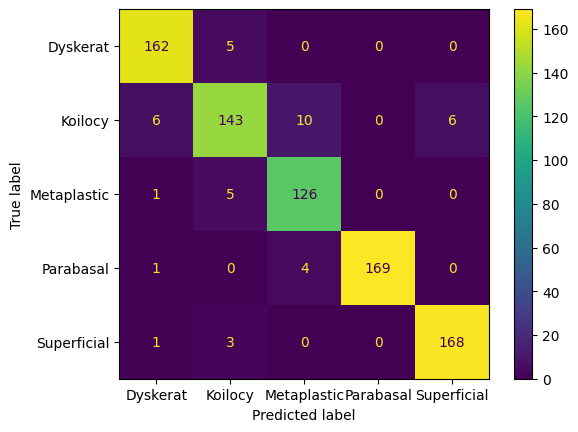

In [22]:
# # SVM for Classification :-
categories = ["Dyskerat", "Koilocy", "Metaplastic", "Parabasal", "Superficial"]

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()


Accuracy of SVM:  70.61728395061728
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.74      0.70      0.72       167
     Koilocy       0.64      0.62      0.63       165
 Metaplastic       0.60      0.65      0.63       132
   Parabasal       0.79      0.82      0.81       174
 Superficial       0.73      0.72      0.73       172

    accuracy                           0.71       810
   macro avg       0.70      0.70      0.70       810
weighted avg       0.71      0.71      0.71       810



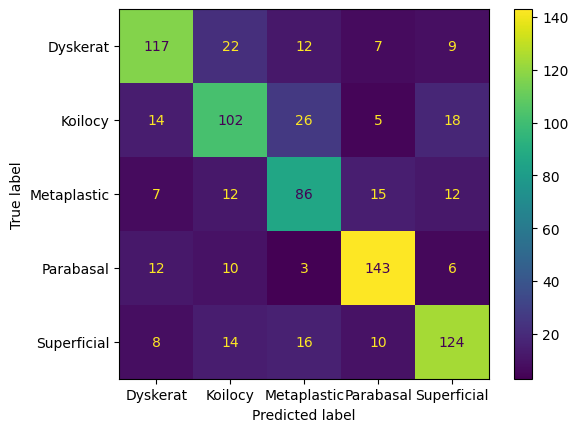

In [17]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  76.17283950617283
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.77      0.86      0.81       167
     Koilocy       0.70      0.64      0.67       165
 Metaplastic       0.71      0.73      0.72       132
   Parabasal       0.94      0.80      0.86       174
 Superficial       0.70      0.77      0.73       172

    accuracy                           0.76       810
   macro avg       0.76      0.76      0.76       810
weighted avg       0.77      0.76      0.76       810



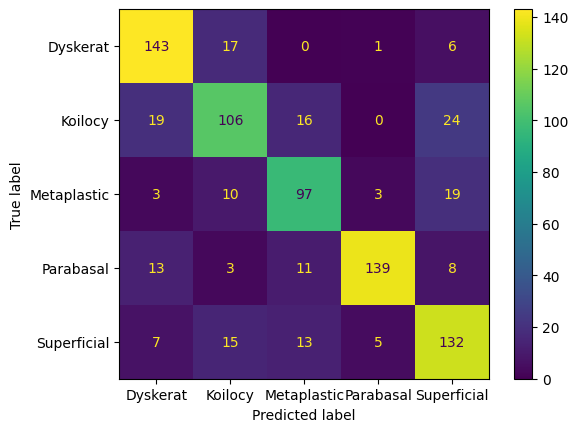

In [23]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  95.30864197530863
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.96      0.96      0.96       167
     Koilocy       0.91      0.90      0.91       165
 Metaplastic       0.92      0.94      0.93       132
   Parabasal       0.99      0.98      0.98       174
 Superficial       0.98      0.98      0.98       172

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



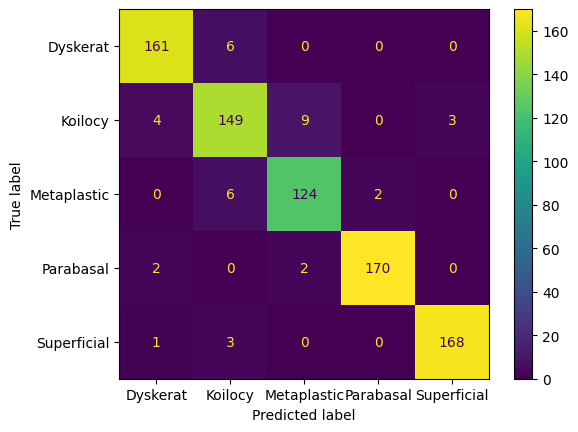

In [18]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  95.30864197530863
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.96      0.96      0.96       167
     Koilocy       0.91      0.90      0.91       165
 Metaplastic       0.92      0.94      0.93       132
   Parabasal       0.99      0.98      0.98       174
 Superficial       0.98      0.98      0.98       172

    accuracy                           0.95       810
   macro avg       0.95      0.95      0.95       810
weighted avg       0.95      0.95      0.95       810



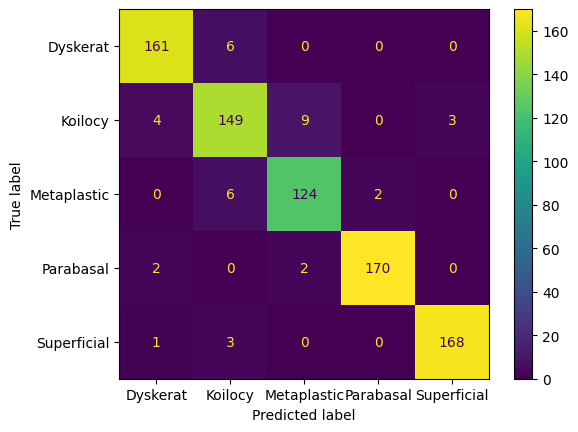

In [24]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  55.55555555555556
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.38      0.48      0.42       167
     Koilocy       0.48      0.52      0.50       165
 Metaplastic       0.60      0.47      0.53       132
   Parabasal       0.71      0.79      0.75       174
 Superficial       0.68      0.50      0.58       172

    accuracy                           0.56       810
   macro avg       0.57      0.55      0.55       810
weighted avg       0.57      0.56      0.56       810



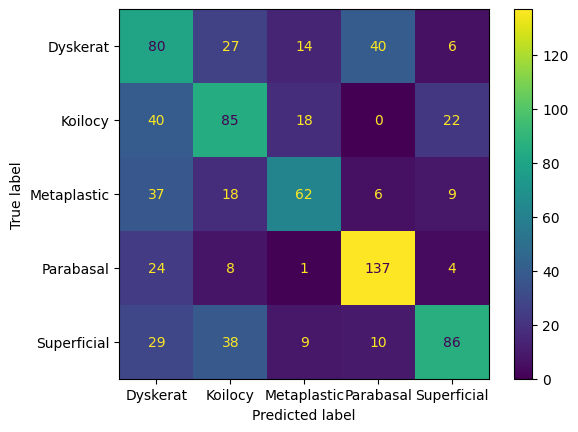

In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  47.40740740740741
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.33      0.50      0.40       167
     Koilocy       0.42      0.56      0.48       165
 Metaplastic       0.52      0.17      0.25       132
   Parabasal       0.67      0.79      0.72       174
 Superficial       0.54      0.28      0.37       172

    accuracy                           0.47       810
   macro avg       0.50      0.46      0.45       810
weighted avg       0.50      0.47      0.46       810



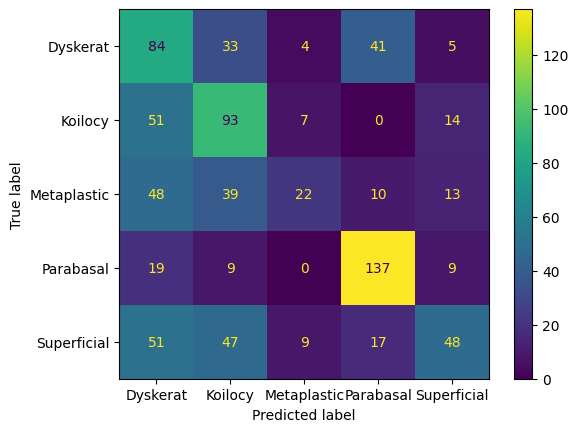

In [25]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  88.14814814814815
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.81      0.97      0.88       167
     Koilocy       0.90      0.65      0.76       165
 Metaplastic       0.93      0.91      0.92       132
   Parabasal       0.88      0.98      0.93       174
 Superficial       0.92      0.89      0.91       172

    accuracy                           0.88       810
   macro avg       0.89      0.88      0.88       810
weighted avg       0.89      0.88      0.88       810



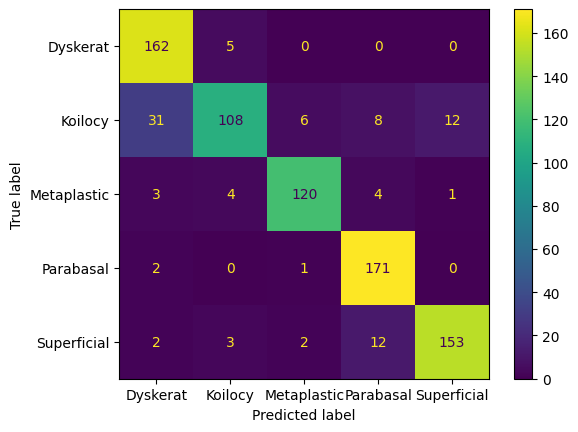

In [20]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

y_pred = Model.predict(X_test)
y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()

Accuracy of SVM:  88.14814814814815
Classification Report: 
               precision    recall  f1-score   support

    Dyskerat       0.81      0.97      0.88       167
     Koilocy       0.90      0.65      0.76       165
 Metaplastic       0.93      0.91      0.92       132
   Parabasal       0.88      0.98      0.93       174
 Superficial       0.92      0.89      0.91       172

    accuracy                           0.88       810
   macro avg       0.89      0.88      0.88       810
weighted avg       0.89      0.88      0.88       810



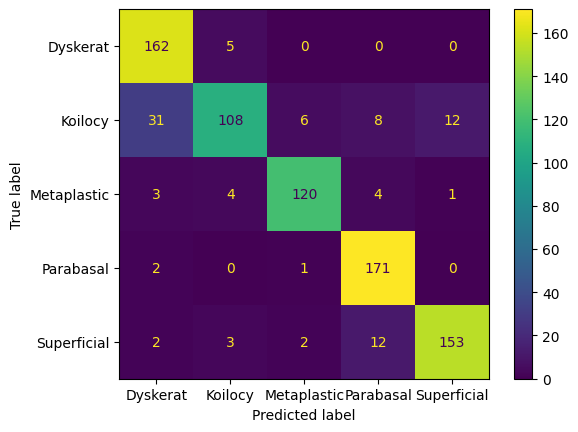

In [26]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

y_pred = Model.predict(X_test)
y_pred = Model.predict(X_test)
from sklearn import metrics
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVM: ", acc_svm*100)
#Accuracy Score
print("Classification Report: \n", classification_report(y_test, y_pred,target_names=categories))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =categories)
cm_display.plot()
plt.show()